# Машинное обучение на матфаке, 2019/2020 уч. год.

## Домашнее задание 1 -- numpy, pandas, matplotlib.

В этом домашнем задании вам предстоит закрепить навыки работы с важнейшими для data science библиотеками -- numpy, pandas и matplotlib.

Правила оценивания на вики-странице. Часть заданий необходимо сдать в [Яндекс.контест](https://contest.yandex.ru/contest/16930/problems/)

In [1]:
import numpy as np

### Part 1. numpy

Задания 1-10 оцениваются в 0.4 баллов.

__Задание 1__. Создайте несколько одномерных массивов размера $10^n$ для n от 1 до 6. из случайных чисел при помощи модуля `np.random`. Заполните их независимыми случайными величинами из нормального распределения с матожиданием 5 и дисперсией 10. 

In [2]:
arr = [np.random.normal(5, 10, size=10**(i+1)) for i in range(0,6)]
# print(arr[5])

В заданиях 2-10 запрещается использование циклов `for` и `while` в сдаваемом вами коде. 

__Задание 2__. Сгенерируйте случайный вектор (одномерный массив) из нормального распределения со средним в нуле и произвольной дисперсией. С помощью `np.where` замените в созданном массиве все отрицательные элементы на нули.

In [3]:
vec = np.random.normal(0, 1, 100)
wo_negative = np.where(vec < 0, 0, vec)
print(vec)
print(wo_negative) # -- все отрицательные превращает в 0
# print(np.where(vec >= 0, vec, 0)) # -- все что больше положительного оставляет на месте, остальное подефолту нуль
# первое кажется более логичным, хотя выполняет тоже самое (?)

[-9.91905941e-01  8.58281563e-01  8.67836954e-01  2.18915614e-01
 -7.30817930e-01 -2.11535176e-01 -1.84391711e-01  5.98273187e-01
 -1.19870547e-02 -1.20295032e+00 -1.79850975e-01  2.54476205e-01
 -4.74863154e-01 -2.36771166e-01  3.78749638e-01  1.27461138e+00
  1.29943701e-01  1.33425680e-01 -3.81946246e-01  2.33861600e+00
  5.62539173e-02 -3.25329836e-01 -4.76384414e-02  7.29652845e-01
  7.24318690e-02  4.89215117e-01  2.33835899e-01  8.25873147e-01
 -3.15487941e-01 -2.90395223e-01 -8.69660122e-01 -1.28453990e+00
  8.71922949e-01 -7.61467401e-01  3.91647310e-01 -4.20632357e-01
  9.59334804e-01 -8.01945340e-01  4.61630930e-01  6.86486288e-01
  6.61455979e-01 -3.44905194e-01 -5.51389638e-01  6.47096531e-02
 -1.40889992e+00  8.89160596e-01  6.70599713e-01  5.57733714e-01
 -1.36914189e+00 -1.29713062e+00  1.16067609e-01  6.70804515e-01
 -1.72815161e-01  4.91007025e-01 -3.65326186e-01  1.48382512e+00
  2.31305830e-01 -6.00463630e-01 -2.55492943e+00  1.12397475e+00
  4.21422800e-02 -4.33905

__Задание 3__. Дан массив 10х3, который будет использован как массив с цветами RGB (каждый канал обозначается целым числом от 0 до 255), однако вследствие порчи данных при передаче значения массива вышли за границы заданного диапазона. Напишите функцию clip_values, которая вышедшие за границу диапазона значения превращает в ближашие границы диапазона.

__Хинт__: воспользуйтесь np.clip

In [4]:
def clip_values(image: np.ndarray) -> np.ndarray:
    return np.clip(image, 0, 255)

# [[r, g, b], [r, g, b]...]
damaged = np.random.normal(127, 255, 30).reshape((10,3))
print(damaged)
fixed = clip_values(damaged)
print(fixed)

[[ 369.09979129  393.89355967  518.67738342]
 [ -42.26076258 -100.24069575  651.7350334 ]
 [ 192.80158015  515.50449362  411.31788816]
 [ -91.11969257   91.54166679  345.39948166]
 [ -27.7582323    65.08891743  213.77145613]
 [-250.39899349 -182.69093481  -81.62161182]
 [  44.69946885 -170.35897379  106.07203622]
 [-388.41800188   64.76395292 -128.49234586]
 [ 265.54695517  213.32238946  135.94673969]
 [-205.82065161   62.03820236   72.04164794]]
[[255.         255.         255.        ]
 [  0.           0.         255.        ]
 [192.80158015 255.         255.        ]
 [  0.          91.54166679 255.        ]
 [  0.          65.08891743 213.77145613]
 [  0.           0.           0.        ]
 [ 44.69946885   0.         106.07203622]
 [  0.          64.76395292   0.        ]
 [255.         213.32238946 135.94673969]
 [  0.          62.03820236  72.04164794]]


__Задание 4__. Сгенерируйте случайный вектор из нормального распределения со средним в нуле и произвольной дисперсией. С помощью `np.insert` в встаьте в него на четные индексы нули.

In [5]:
vec = np.random.normal(0, 1, 100)
# print(vec)
new_vec1 = np.insert(vec, range(0, 100, 2), 0) # Вектор, которому на четные места вставили нули
new_vec2 = np.insert(vec, range(100), 0) # Вектор, у которого на четных местах нули
# PS: вместо range(0, 100, 2) можно использовать np.arange(0, 100, 2). (Что лучше?)
print(vec)
print(new_vec1)
print(new_vec2)

[ 1.75861283e+00 -4.79433539e-01 -1.54060734e+00  1.30907754e+00
 -9.48768393e-01 -7.26358310e-03  1.12181898e+00  5.54449679e-01
 -7.84801410e-02 -1.10117759e+00  1.76691294e+00  5.72602409e-01
  3.78050036e-01  4.25759235e-02  9.90164122e-01 -1.31183853e-01
  3.07107862e-01 -6.68557106e-01  4.42471234e-01  7.83715841e-01
 -1.70624814e-01  1.28253839e+00  5.85967086e-01 -5.39586534e-01
  6.75898043e-01 -1.66260993e+00 -1.28634116e-02  2.90707412e-02
  1.92736719e-01  1.06198140e+00 -1.19216333e+00 -1.34285758e-01
 -4.62890225e-01 -6.58248281e-01  1.85944776e+00  1.18999678e+00
 -7.53501925e-01  3.45187460e-01 -1.62789881e+00 -6.30677950e-01
  8.90570078e-01  2.25931698e-01 -2.20143860e-01  5.56686713e-01
 -2.02608688e-02 -1.88651292e+00 -2.07404576e+00 -1.84240514e+00
 -2.58475496e-01 -1.71861945e+00 -3.00252635e-02 -2.22309585e-04
  1.05219104e+00 -1.77726395e+00  7.17637131e-01  8.47878793e-01
  1.46504453e+00 -1.89768465e+00 -1.14315472e+00  6.44496108e-01
  2.59615961e-01  2.94929

__Задание 5__. Создайте случайный масиив 4х4 из нормального распределения со средним в нуле и произвольной дисперсией и верните индексы положительных элементов (`np.argwhere`)

In [6]:
matr = np.random.normal(0, 1, 16).reshape((4,4))
print(matr)
positive_indexes = np.argwhere(matr > 0)
print(positive_indexes)

[[-1.72116328  2.2586814  -0.40283448 -0.30239003]
 [-0.43477945 -0.75437204 -1.63710815 -0.27627086]
 [-0.73294568  0.00834854  0.14979034 -1.53731907]
 [-1.7845714  -0.89004341  0.07691034  0.39782453]]
[[0 1]
 [2 1]
 [2 2]
 [3 2]
 [3 3]]


__Задание 6__. Создайте матрицу случайных целых чисел от в интервале от 1 до 10 размера 5х5 и посчитайте следующее (сабмодуль `np.linalg`):

- определитель матрицы
- обратную матрицу
- произведение матрицы на саму себя
- собственные вектора



In [7]:
matr = np.random.randint(1, 11, 25).reshape((5,5))
print( 'matrix: \n{} \n\n determinant {} \n '
      'inverse \n {} \n\n'
      'square: \n{}\n\n'
       'eigenvectors: {}'.format(matr, np.linalg.det(matr),
            np.linalg.inv(matr),
            matr.dot(matr),
            np.linalg.eig(matr)) )

matrix: 
[[ 9 10  1  3  2]
 [ 7  6  5  4  8]
 [10  2  3  5 10]
 [ 1  6  4  5  3]
 [ 5  5  2  2  8]] 

 determinant 5793.000000000003 
 inverse 
 [[ 0.06542379  0.10771621  0.0467806  -0.11669256 -0.13878819]
 [ 0.05679268 -0.03314345 -0.09131711  0.0359054   0.11962714]
 [-0.0709477   0.48213361 -0.13516313 -0.10564474 -0.255826  ]
 [ 0.01260142 -0.3143449   0.20162265  0.25720697 -0.03728638]
 [-0.06179872 -0.08855515  0.01122044  0.01260142  0.21025375]] 

square: 
[[174 180  78  91 133]
 [199 180  84 106 188]
 [189 198  69  98 161]
 [111  99  69  78 129]
 [142 136  60  71 140]]

eigenvectors: (array([25.28049035+0.j        , -0.97611959+3.59856597j,
       -0.97611959-3.59856597j,  3.83587442+1.3299102j ,
        3.83587442-1.3299102j ]), array([[-0.46244593+0.j        , -0.02736231+0.33574711j,
        -0.02736231-0.33574711j, -0.29935187-0.39625779j,
        -0.29935187+0.39625779j],
       [-0.52601522+0.j        , -0.02212933-0.3485605j ,
        -0.02212933+0.3485605j ,  0.0017

Задания 7-10 необходимо сдать в [Яндекс.контест](https://contest.yandex.ru/contest/16930/problems/) и прикрепить ссылку на решение в формате `https://contest.yandex.ru/contest/xxxxx/run-report/xxxxx/`. Сдавайте задания строго в соответствии с написанной сигнатурой и возвращаемыми типами. Для сдачи необходимо отправить в соответствующую задачу файл, содержащий функции и необходимые импорты. Обратите внимание, что вам доступен только `numpy`. При сдаче выберите компилятор make. __При отсутствии ссылки на решение задание засчитано не будет!__

__Задание 7__. Напишите функцию, которая находит сумму квадратов положительных элементов одномерного массива.

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30621657/

In [8]:
def get_squares(a: np.ndarray) -> float:
    return np.sum(np.square(np.where(a < 0, 0, a)))

assert get_squares(np.array([1,-2,3])) == 10

# a = np.array([1, -2, 3])
# print(np.sum(np.square(np.where(a < 0, 0, a))))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621657/`

__Задание 8__. Коля -- мастер покера и умеет выигрывать только целые суммы денег от 0 до n - 1. Коля решил сыграть на турнире. На вход подаётся массив `p` размера $n$, где `p[i]` -- вероятность, что Коля выиграет на турнире $i$ рублей ($\sum_{i=1}^{n}p_i =1$, $p_i \geqslant 0, \forall i$). Посчитайте математическое ожидание выигрыша Коли на турнире.


__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30621663/

In [ ]:
def expected_reward(p: np.ndarray) -> float:
    return p.dot(np.array(range(len(p))))

assert expected_reward(np.array([0.4, 0.5, 0.1])) == 0.7

# p = np.array([0.4, 0.5, 0.1])
# print(p.dot(np.array(range(len(p)))))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621663/`

__Задание 9__. Дана квадратная матрица `A`. Посчитайте произведение диагональных элементов матрицы, __строго__ превосходящих среднее значение элементов всей матрицы.

__Хинт__: взять диагональ матрицы -- np.diag(), произведение элементов массива -- np.prod(), среднее значение в массиве -- np.mean().

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30720141/

In [ ]:
def prod_upper_avg_diagonal(a: np.ndarray) -> float:
    diag = np.diag(a)
    return np.prod( diag[diag > np.mean(a) ] )

assert prod_upper_avg_diagonal(np.array([[ 0,  1,  2,  3],
                                         [ 4,  5,  6,  7],
                                         [ 8,  9, 10, 11],
                                         [12, 13, 14, 15]])) == 150

# a = np.array([[ 0,  1,  2,  3],
#              [ 4,  5,  6,  7],
#              [ 8,  9, 10, 11],
#              [12, 13, 14, 15]])
# diag = np.diag(a)
# mean = np.mean(a)
# print(diag)
# print(mean)
# print(np.prod(np.where(diag > mean, diag, 1)))

# print(prod_upper_avg_diagonal(a))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30720141/`

__Задание 10__. Дано число $n$. Создайте матрицу $A$ размера $n \times n$ такую, что $A[i][j] = i \cdot j$. Нумерация строк и столбцов начинается с нуля.

__Ссылка на посылку в контесте:__ https://contest.yandex.ru/contest/16930/run-report/30621681/

In [ ]:
def create_ij(n: int) -> np.ndarray:
    a = np.array(range(n)).reshape(1, -1)
    return a.T.dot(a)

assert np.all(create_ij(5) == np.array([[ 0,  0,  0,  0,  0],
                                        [ 0,  1,  2,  3,  4],
                                        [ 0,  2,  4,  6,  8],
                                        [ 0,  3,  6,  9, 12],
                                        [ 0,  4,  8, 12, 16]]))

# print(create_ij(5))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621681/`

### Part 2. Numpy vs pure python


__Задание 11__. (1 балл) Выберите любые 5 функций из заданий 2-10 и имплементируйте их, но без использования сторонних библиотек (считайте, что вам доступны только стандартные библиотеки языка Питон и на вход вместо массивов подаются питоновские списки).

In [ ]:
import random

#1 Task 1
def normal_distr(n):
    return [random.gauss(0, 1) for _ in range(n)]
    
def without_negatives(arr):
    return [max(x, 0) for x in arr]

#2 Task 5
def create_gauss_sq_matrix(n):
    return [[random.gauss(0, 1) for _ in range(n)] for _ in range(n)]

def where_positive(matr):
    ans = []
    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] > 0:
                ans.append([i, j])
    return ans
# m = create_gauss_sq_matrix(4)
# print(m)
# print(where_positive(m))

#3 Task 7 сумму квадратов положительных элементов одномерного массива.
def py_get_squares(arr):
    return sum([a*a for a in arr if a > 0])
# print(py_get_squares([1,-2,3]))

#4 Task 8
def py_expected_reward(prob_arr):
    ans = 0
    for p in range(len(prob_arr)):
        ans += p*prob_arr[p]
    return ans
# print(py_expected_reward([0.4, 0.5, 0.1]))

#5 Task 10
def py_create_ij(n: int):
    arr = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(i*j)
        arr.append(row)
    return arr
# print(py_create_ij(5))

__Задание 12__. (3 балла) Сравните время работы векторизованных функций с обычными. Для этого постройте графики зависимости времени исполнения функции от размера входного массива. Перебирайте значения от 1 до $10^6$ по логарифмической шкале. Сделайте выводы.

__Графики должны быть опрятными!__. Подписывайте оси, и единицы измерения, указывайте легенду и название графика. Оценка за задание с неопрятными графиками может быть снижена! Сравнение плохого и хорошего графиков:

In [ ]:
import sys
import timeit # https://stackoverflow.com/questions/8220801/how-to-use-timeit-module/29512249
import matplotlib.pyplot as plt # для графико
plt.ioff()

import numpy as np

# def compared_plot(legend=''):
#     pass

def timings_and_plot(pure_py_func, np_func, args_func, title="Simple Plot", 
                     number=5, low=1, high=6, base=10, samples=13):
    '''
        pure_py_func -- функция чистого питона, без NP
        np_func -- функция NP
        args_func -- лямбда функция, которая генерирует входные данные для pure_py_func и np_func
                        по сути, функнция-генератор // generation function of input
        title -- легенда(название) нашего графика (подПИСЬКА сверху) // забавно, что legend, т.е. легенда графика у matplot это совсем НЕ легенда, а название это легенда [fun facts at 6am]
        number -- timeit.timeit(... -->number= <-- ) вот этот номер, " method with number executions"
                    "сколько раз выполняется функция" // https://docs.python.org/3/library/timeit.html
        low -- нижнее значение степени base
        high -- верхнее значение степени base
        base -- "база" логарифма
        samples -- сколько точек 
    '''
    logspace = np.logspace(low, high, num=samples, base=base) # log space of dots (basicly axis X)
    pure_time = [] # timings of Py
    numpy_time = [] # timings of NumPy
    
    for s in logspace:
        args = args_func(int(s))
        pure_time.append(timeit.timeit(lambda: pure_py_func(*args), number=number) / number)
        numpy_time.append(timeit.timeit(lambda: np_func(*args), number=number) / number)
        
#         print('input: {}\t np_time: {}\t, pp_time: {} \n'.format(s, numpy_time[-1], pure_time[-1]))
#         print(s)
#         print(logspace)
#         print(pure_time)
#         print(numpy_time)
#         print('\n')

    
    normal = plt.gca()
    normal.set_title(title)
    normal.set_ylabel('time')
    normal.set_xlabel('size of input')
    normal.plot(logspace, pure_time, label='Pure Python', marker='o')
    normal.plot(logspace, numpy_time, label='NumPy', marker='o')
    plt.legend()
    plt.show()
    
#     ToDo: https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python
#             Надо подумать как правильно тут логарифм шкалу сделать! 
    logsized = plt.gca()
    logsized.set_title('Log scale')
    logsized.set_ylabel('log(time)')
    logsized.set_xlabel('size of input (with log-scale)')
#     logsized.set_yscale('log')
    logsized.set_xscale('log')
    logsized.plot(logspace, np.log(pure_time), label='Pure Python', marker='o')
    logsized.plot(logspace, np.log(numpy_time), label='NumPy', marker='o')
    plt.show()    
        

__Хинт__: воспользуйтесь библиотекой `time` или мэджиком `%timeit`.

__Замечание__: Далее будет производиться сравнение быстроты работы функций с использыванием `timings_and_plot(...)`.
Для удобства функции будут продублированы, они будут в точности повторять написанные функции в заданиях 2-10.
Функции, начинающиеся с `np_` -- это функции, которые написаны с использыванием NumPy, а функции, которые начинаются с `pp_` -- это функции чистого питона, он же PurePython.

__Теория__:
Пусть время работы это $t$ и оно зависит от входа как $O(f(n))$. В данном задании работа всех алгоритмов полиномиальна по времени, тогда $t = O(n^m)$, то есть это $t = c_0 + \sum_{k<n}{c_k n^k}$. 

Будем строить график времени работы $t(n)$, а также график $\log(t) (n)$. Второй график позволит нам понять асимптотику работы каждого из алгоритмов, т.к. $\log(t) = \log(C) + \left( \sum k \right) \log n$.

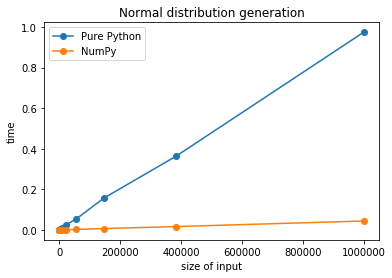

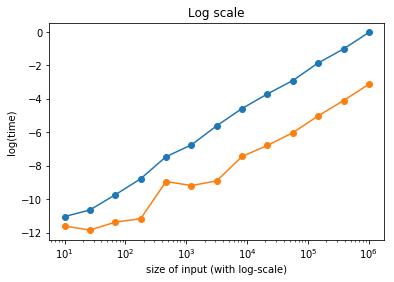

In [ ]:
#             PurePy vs NumPy
# Task 0: _Нормальное распределение_
# Первым(нулевым) шагом хочется выяснить с помощью чего генерировать случайные числа быстрее

import random

def np_normal_gaus(n):
    return np.random.normal(0, 1, n)

def pp_normal_gaus(n):
    return [random.gauss(0, 1) for _ in range(n)]

timings_and_plot(pp_normal_gaus, np_normal_gaus, lambda n: (n,), title="Normal distribution generation")

# Работает за другое О-большое? Но кажется, что работает за другую константу, которая много меньше purepy-const

_Вывод 0_: Из первого графика видно, что PurePy работает за $O(n)$, а из второго графика видно, что степени в асимптотике у NumPy и PurePy -- одинаковые, следовательно, NumPy работает тоже за $O(n)$, но с ощутимо меньшей константой.

Случаные распределения быстрее генерирует NumPy, в дальнейшем будем его и использовать для данной задачи.

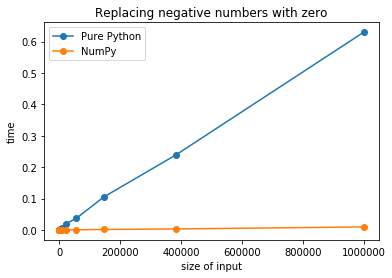

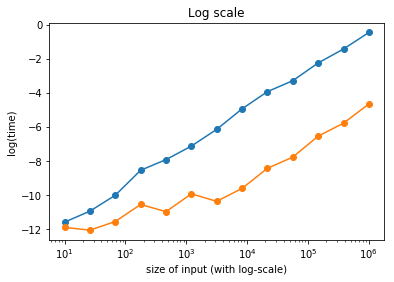

In [ ]:
#             PurePy vs NumPy
# Task 1: _Удаление отрицательных чисел из распределение_
# Постановка: на вход подается массив, необходимо вместо отрицательных чисел написать нули.

def np_wo_negative(vec):
    return np.where(vec < 0, 0, vec)

def pp_wo_negative(vec):
    return [max(x, 0) for x in vec]

timings_and_plot(pp_wo_negative, np_wo_negative, lambda n: (np.random.normal(0, 1, n),),
                 title="Replacing negative numbers with zero")

# Работает за другое О-большое

In [ ]:
#             PurePy vs NumPy
# Task 2: _Удаление отрицательных чисел из распределение_
# Постановка: на вход подается массив, необходимо вместо отрицательных чисел написать нули.

def np_positive_indexes(matr):
    return np.argwhere(matr > 0)

def pp_positive_indexes(matr):
    ans = []
    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] > 0:
                ans.append([i, j])
    return ans

timings_and_plot(pp_positive_indexes, np_positive_indexes, 
                 lambda n: (np.random.normal(0, 1, n*n).reshape((n,n)),),
                 title="Getting positive indexes", high=3)
# O(n^2) => (10^3)^2
# Работает за другое О-большое

In [ ]:
#             PurePy vs NumPy
# Task 3: _Сумма квадратов положительных элементов_
# Постановка: на вход подается массив, необходимо взять сумму квадратов всех его положительных элементов.

def np_positive_sum(arr):
    return np.sum(np.square(np.where(arr < 0, 0, arr)))

def pp_positive_sum(arr):
    return sum([a*a for a in arr if a > 0])


timings_and_plot(pp_positive_sum, np_positive_sum, 
                 lambda n: (np.random.randint(0, 10**3, n), ),
                 title="Sum of positive integers in array")

# Работает за другое О-большое

In [ ]:
#             PurePy vs NumPy
# Task 4: _Математическое ожидание_
# Постановка: на вход подается массив вероятностей, необходимо взять сумму его элементов умноженных на индекс, т.е. мат.ожидание.

def np_expected_reward(prob_arr):
    return prob_arr.dot(np.array(range(len(prob_arr))))

def pp_expected_reward(prob_arr):
    ans = 0
    for p in range(len(prob_arr)):
        ans += p*prob_arr[p]
    return ans

timings_and_plot(pp_expected_reward, np_expected_reward, 
                 lambda n: (np.random.normal(0, 1, n), ), # тут мог быть бы более умный генератор, который проверял бы что сумма всех вероятностей единица и прочее,
                                                          # но нас интересует время работы от длины входа, поэтому можем использовать вот такую глупую" версию
                 title="Expected value problem")

# Работает за меньшую константу!

In [ ]:
#             PurePy vs NumPy
# Task 5: _Создание ij-матрицы_
# Постановка: на вход число, необходимо создать матрицу M n*n такую, что M_ij = i*j

def np_create_ij(n):
    a = np.array(range(n)).reshape(1, -1)
    return a.T.dot(a)

def pp_create_ij(n):
    arr = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(i*j)
        arr.append(row)
    return arr

timings_and_plot(pp_create_ij, np_create_ij, 
                 lambda n: (n, ),
                 title="Creating ij matrix", high=3)

# Работает за меньшую константу!

__Вывод__: NumPy > PurePy

 1. Легко можно видеть, что время работы для "чистого" python'а увеличивается линейно от увеличения входа, то есть он работает за $O(n)$. В случае NumPy до определенного момента асимптотика работы NumPy сильно меньше, но примерно начиная $10^3$ он начинает работать аналогично PurePy, но __опять с меньшей константой__.
 2. Здесь можно увидеть ситуацию аналогичную предыдущему пункту, но в этот раз numpy работает примерно за константу до $10^2$, а дальше _выходит_ на $O(n)$.
 3. Ситуация абсолютно аналогичная предыдущим, что в очередной раз подтверждает, что numpy справляется быстрее.
 4. Видно, что время работы numpy и purepy отсличаются не столь сильно, как возможно этого хотелось бы.
 5. Очередное подтверждение быстроты numpy на фоне чистого питона. 

Общий вывод -- __numpy работает быстрее чем чистый python__. Но эта быстрота на _"небольших"_ вводах отличается на полином, а на _"большИх"_ совпадает с О-большим чистого python (т.е. имеет аналогичную асимптотику), но заметно отличается в константе, чем обеспечивает себе приемущество.

__ИТОГ__: __NumPy быстрее чем PurePy__, но имеет аналогичную асимптотику.

In [ ]:
#             PurePy vs NumPy
# Task 5.5: _Создание последовательного массива длины n_
# Постановка: на вход число, последовательный массив длины n
# Замечание: В процессе решения _задания 4_ у меня возник что лучше: использовать range() или np.arrange().
# кажется очевидным, что np.arrange лучше, но хочется понять насколько он лучше.


timings_and_plot(
    lambda m: list(range(m)),
    lambda k: np.arange(k),
    lambda n: (n, ),
    title='Range array generators',
    high=6,
    number=100,
    )

# ЧТО? Шок-контент... NumPy создает range дольше!
print('goin\' forward')

timings_and_plot(
    lambda m: list(range(m)),
    lambda k: np.array(range(k)),
    lambda n: (n, ),
    title='Time for list(array-creation)',
    high=6,
    number=10,
    )

### Part 3. Pandas.

Задания 13-22 оцениваются в 0.4 баллов.  В заданиях 13-22 запрещается пользоваться циклами `for` и `while` в сдаваемом вами коде. Задания 13-15 также сдаются в контест с компилятором python3.6+numpy+pandas. В конце сдаваемого вами файла должны быть строки
```
import sys
exec(sys.stdin.read())
```

In [ ]:
import pandas as pd

__Задание 13__, Дан датафрейм, в котором существует колонка 'email' (строка, длиной не более 255). Напишите функцию, которая в заданном датафрейме заменяет все невалидные email'ы на "unknown@unknown.com". Валидным сичтается емэйл, выглядящий как `[name]@[subdomain].[domain]`, где `[name]` -- строка, содержащая латинский буквы, точки и знаки `-` и `_`, `[subdomain]` и `[domain]` -- строки, содержащие только латинские буквы и цифры. Длина строки `[domain]` -- не больше 8 символов.

__Хинт__. Вопспользуйтесь методом .apply(), в который передайте функцию для обрабоки одного email'a.


__Ссылка на посылку в контесте:__ https://contest.yandex.ru/contest/16930/run-report/30641895/

In [ ]:
import re

def reset_emails(df: pd.DataFrame) -> pd.DataFrame:
    df['email'] = df['email'].apply( lambda e: validate(e) )
    return df

def validate(e):
    if bool( re.search('^[\w\.\-]+\@[a-zA-Z0-9]+\.[a-zA-Z0-9]{,8}$', e) ):
        return e
    else:
        return "unknown@unknown.com"

# r'^[\w\.\-]+\@ [a-zA-Z0-9]+ \. [a-zA-Z0-9]{,8}$ -- соответсвие регулярному выражению
# ^ -- начало
# [\w\.\-]+ -- любое из: \w -- буквы, цифры и _; \. -- точка; \- -- черточка. + -- хотяб одно [name]
# \@ -- будет собачка @
# [a-zA-Z0-9]+ -- латинские и цифры, хотяб одно [subdomain]
# \. -- точка .
# [a-zA-Z0-9]{,8} -- неболее 8 букв или/и цифр [domain]
# $ -- конец строки
# https://www.geeksforgeeks.org/regular-expression-python-examples-set-1/

import sys
exec(sys.stdin.read())

# df = pd.DataFrame({
#     'email': [
#         "qwe@rty.ru", "asd@fg.gg", "unknown@unknown.com", "alex.k-_12"
#     ],
#     'income': [5.5, 6.5, 7.2, 8.2]
# })
# print(
#     reset_emails(df)
# )
# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30641895/`

__Задание 14__. Дан датафрейм, в котором существуют колонки `age` (возраст в годах, целое число) и `income` (дробное число). Напишите функцию, которая вернёт средний заработок людей младше 18 лет.

__Ссылка на посылку в контесте:__ https://contest.yandex.ru/contest/16930/run-report/30639732/

In [ ]:
def get_mean_income(df: pd.DataFrame) -> float:
    return df[df['age'] < 18]['income'].mean()

import sys
exec(sys.stdin.read())

# df = pd.DataFrame({
#     'age': [10, 15, 20, 25, 18, 100],
#     'income': [5.5, 6.5, 7.2, 8.2, 8, 1000]
# })
# print(df[df['age'] < 18]['income'].mean())
# print( df[ df['age'] < 18 ].mean()['income'] )
# print(get_mean_income(df))
# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30639732/`

__Задание 15__. Дан датафрейм, в котором существуют колонки 'id' (идентификатор пользователя, целое положительное число), 'age' (возвраст в годах, целое число), 'sex' (пол пользователя, строка, равная либо "Male", либо "Female", либо "Other"), "favorite_color" (любимый цвет пользователя, строка длиной не более 255). Найдите число различных любимых цветов у женщин младше 18 лет.

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30640055/

In [ ]:
def get_fav_color(df: pd.DataFrame) -> int:
    return df[
         ( df['sex'] == 'Female' ) & ( df['age'] < 18 )
    ]['favorite_color'].nunique()

import sys
exec(sys.stdin.read())

# df = pd.DataFrame({
#     'id': [10, 15, 20, 25, 18, 100, 11, 5, 21, 35, 28, 110],
#     'age': [10, 12, 14, 15, 22, 22, 10, 12, 14, 15, 22, 22],
#     'sex': ['Male', 'Female', 'Other', 'Female', 'Female', 'Male', 'Male', 'Female', 'Other', 'Female', 'Female', 'Male'],
#     'favorite_color': [5.5, 6.5, 7.2, 8.2, 8, 250, 5.5, 6.5, 7.2, 8.2, 8, 250]
# })
# print(get_fav_color(df))
# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30640055/`

### Part 4. EDA with pandas.

В этом задании предлагается сделать разведочный анализ данных в датафрейме. 

Мы будем работать с датасетом русскоязычных твитов. Скачайте данные по ссылке: https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1

Корпус состоит из 12 столбцов:

    – id: уникальный номер сообщения в системе twitter;
    – tdate: дата публикации сообщения (твита);
    – tmane: имя пользователя, опубликовавшего сообщение;
    – ttext:  текст сообщения (твита);
    – ttype: поле в котором в дальнейшем будет указано к кому классу относится твит (положительный, отрицательный, нейтральный);
    – trep: количество реплаев к данному сообщению. В настоящий момент API твиттера не отдает эту информацию;
    – tfav: число сколько раз данное сообщение было добавлено в избранное другими пользователями;
    – tstcount: число всех сообщений пользователя в сети twitter;
    – tfol: количество фолловеров пользователя (тех людей, которые читают пользователя);
    – tfrien: количество друзей пользователя (те люди, которых читает пользователь);
    – listcount: количество листов-подписок в которые добавлен твиттер-пользователь.


In [ ]:
# # For linux/google colab users -- download directly from the notebook
# ! wget -O tweets.csv https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1 

In [ ]:
df = pd.read_csv("data/tweets.csv")

In [ ]:
df.head()

__Задание 16__. Создайте колонку 'tdif', равную разнице числа друзей и числа фолловеров у пользователя.

In [ ]:
df['tdif'] = df['tfol'] - df['tfrien']
df.head()

__Задание 16__. Создайте датафрейм, в котором остались только строки с чётными номерами, и пронумеруйте их начиная с 0.

In [ ]:
evendf = df[::2].reset_index().rename( columns={'index':'old_index'} )
evendf.head()
# .rename (нужно лишь для себя, чтоб увидеть, что индексы действительно только четные взялись)
# если что уберём с помощью .drop

__Задание 17__. Создайте датафрейм, в котором остались лишь твиты положительной тональности.

In [ ]:
df_positive = df[ df['ttype'] > 0]
df_positive.head()

__Задание 18__. Посчитайте число уникальных пользователей (пользователей с различными tmane).

__Хинт__: воспользуйтесь np.unique.

In [ ]:
count_unique_users = df['tmane'].nunique()
print(count_unique_users)

__Задание 19__. Посчитайте основные статистики по числу подписчиков при помощи метода .describe(). Постройте гистограмму значений признака.

In [ ]:
df_grouped = df[['tmane', 'tfol']].groupby('tmane').max().copy() 
# Убирает ситуацию с повторяющимся подсчетом от человека, который написал несколько твитов
# Без этого было бы, что если 'username'  c 10 подписичиками написал 100к твитов, то его несколько раз учитывает
descr = df_grouped['tfol'].describe()

print(descr)

ax = plt.gca()
ax.set_title('Распределение количества подписчиков')
ax.set_xlabel('Количество подписчиков на аккаунте')
df_grouped['tfol'].hist(
    bins=int(descr['count']//descr['mean']*4), 
    range=(descr['min'], descr['max']),
#     column='tfol',
    ax=ax
)
plt.show()

ax2 = plt.gca()
ax2.set_title('Распределение количества подписчиков 75% от всех')
ax2.set_xlabel('Количество подписчиков на аккаунте 75% от всех')
df_grouped['tfol'].hist(
    bins=int(descr['count']//descr['mean']), 
    range=(descr['min'], descr['75%']),
#     column='tfol',
    ax=ax2
)
plt.show()

__Задание 20__. Посчитайте число ретвитов в датасете (твитов, начинающихся с "RT @").

In [ ]:
df_retweets = df[ df['ttext'].str.startswith('RT @', na=False) ] # All retweets (более объемлимо чем просто число ретвитов!)
print(len(df_retweets))

__Задание 21__. Назовём длинным такой твит, что его длина больше, чем не менее 80% всех твитов. Найдите число длинных твитов.

In [ ]:
q_len = df['ttext'].apply(len).quantile(q=0.8)
df_longtweets = df[ df['ttext'].apply(len) > q_len ]
print(len(df_longtweets))

__Задание 22__. Постройте гистограмму распределения числа твитов по месяцам. В какой месяц какого года было опубликовано больше всего твитов?

__Хинт__: Время в колонке tdate -- это Unix time, и оно отображает то, сколько секунд прошло с 00:00:00 1 января 1970 года. Для конвертации этого времени в удобный формат воспользуйтесь библиотекой `datetime`.

In [ ]:
import matplotlib.dates as mdates

date_df = df[['tdate']].copy()
date_df['date'] = pd.to_datetime(date_df['tdate'], unit='s').dt.normalize()
date_df['date'] = date_df['date'].astype("datetime64")

#plot data
fig, ax = plt.subplots(figsize=(15,4))
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
ax.set_title('Количество твиттов по дням')
ax.set_xlabel('Календарная дата')
date_df['date'].hist(ax=ax, bins=(date_df['date'].max() - date_df['date'].min()).days)

plt.show()

# https://stackoverflow.com/questions/38228995/how-can-i-draw-the-histogram-of-date-values-group-by-month-in-each-year-in-pytho
# https://scentellegher.github.io/programming/2017/05/24/pandas-bar-plot-with-formatted-dates.html

__Вывод__: Из распределения выше можно понять несколько вещей, а также попробовать их объяснить.
1) Во-первых, отвечая на вопрос задания, больше всего твиттов было опубликовано в декабре месяце.
2) Во-вторых, как мы видимо пик пришелся на первую половину декабря.
Это можно объяснить тем, что именно в то время [_начался Майдан_](https://censor.net.ua/photo_news/316008/11_dekabrya_2013_goda_osobennaya_data_v_tu_noch_mayidan_vstal_na_put_borby_i_stalo_yasno_chto_pobeda), а т.к. данная выборка по ру-твиттеру, очевидно, что именно в тот момент времени пользователи были наиболее активны.
3) В-третьих, Новый год (т.е. 1ое января), ровно как и рождество (26 декабря или 6 января) не вызывает ажиотажа, который можно было бы предположить

PS: Можно попробовать выкинуть первую половину декабря и попробовать соотнести количество твиттов с [событиями декабря-января](https://ru.wikipedia.org/wiki/Декабрь_2013_года), но проделывать такой анализ в 2к20, мне кажется, нерелевантным.

Наиболее интересное явление на данном графике -- корреляция событий начала декабря и политических событий, на фоне всего остального.

__Задание 23__. Вставьте ниже смешную картинку, желательно про машинное обучение. Лучшие картинки мы наградим бонусными баллами (но это не точно).

   ![The meme](https://i.imgur.com/BE3w9mu.jpg)


( мемы про PyTorch не завезли :с )

__Задание 999__. Напишите ниже, чего вы ждёте от курса, какой формат лекций и семинаров вам более интересен, в какие дни хотели бы поставить семинары, темы, которые хотели бы изучить, промежуточный фидбек (при наличии), а также произвольные пожелания и предложения. Мы постараемся всё это учесть.
